In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.24_45.00_50.00_LVMYO_HEX8_83648_wr.xplt")
lv = LV.from_file(filepath)
lv.identify_regions(LV_GEO_TYPES.TYPE_A,
    endo_epi_args={"threshold":85,})

In [3]:
import json
with open("../sample_files/spk_json.json", "r") as spk_file:
  spk_json = json.load(spk_file)
for spk_data in spk_json:
  if spk_data["from_nodeset"] == "endo":
    spk_data["from_nodeset"] = LV_SURFS.ENDO.value
  elif spk_data["from_nodeset"] == "epi":
    spk_data["from_nodeset"] = LV_SURFS.EPI.value
  else:
    print(spk_data)

for spk_data in spk_json:
  lv.create_speckles(**spk_data)

In [4]:
# lv.plot("surface", 
#         scalars=LV_MESH_DATA.SURFS,
#         # container="cells",
#         show_edges=True,
#         categorical=True,
#         split_sharp_edges=True,
#         smooth_shading=False,
#         pretty=False,
#         )

Volume:

In [5]:
lv.volume()

array([95993.98140237, 77619.19861646, 63257.7453644 , 53339.77682199,
       46834.19796486, 46450.63398739, 46676.83046096, 46729.32112039,
       46795.73413616, 46934.14508683, 47116.98245368, 47298.89414408,
       47538.56738255, 47805.70476376, 48134.55980313, 48420.45798249,
       48729.50199268, 49061.81135896, 49400.84255932, 49747.92877439,
       50101.6734778 , 50454.94842903, 50811.37975838, 51169.11316778,
       51526.34864955, 51883.41325396, 52238.83464323, 52590.31081084,
       52936.75721954, 53277.40193504, 53612.00089657, 53940.03285051,
       54261.43492141, 54576.22483071, 54884.06066516, 55184.43146293,
       55476.93940501, 55761.96521925, 56039.82847599, 56310.60282253,
       56574.19954225, 56831.12134436, 57081.75939757, 57326.21407796,
       57564.58437723])

Spks-data relationship not found for metric volume. Check 'set_data_spk_rel' or 'add_spk_data'.


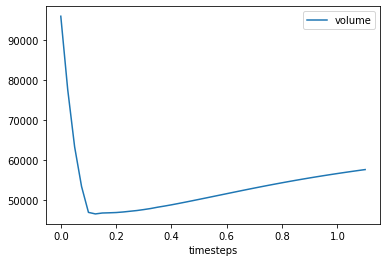

In [6]:
lv.plot_metric(lv.STATES.VOLUME, kind="line")

Ejection Fraction:

In [7]:
lv.ejection_fraction()

array([ 0.        , 19.14159879, 34.10238388, 44.43424885, 51.21131838,
       51.61088924, 51.37525314, 51.32057194, 51.25138738, 51.10720026,
       50.91673273, 50.72722951, 50.47755423, 50.19926868, 49.85668987,
       49.55886059, 49.23691956, 48.89074227, 48.53756263, 48.17599182,
       47.80748465, 47.43946684, 47.06816092, 46.69549859, 46.32335497,
       45.95138935, 45.58113553, 45.21499156, 44.85408726, 44.49922677,
       44.15066433, 43.80894295, 43.47412814, 43.14620142, 42.82551899,
       42.51261313, 42.20789825, 41.91097775, 41.62151871, 41.33944441,
       41.06484728, 40.79720362, 40.53610595, 40.28144969, 40.03313173])

Longitudinal shortening:

In [8]:
lv.longitudinal_shortening()

array([ 0.        ,  0.46901488, -0.06550491, -0.94165826, -1.5020456 ,
       -1.7143162 , -1.74463706, -1.80390488, -1.80052704, -1.78349104,
       -1.80201795, -1.85131445, -1.89387787, -1.93142238, -1.83428463,
       -1.81711042, -1.84227584, -1.90939522, -1.96673013, -2.02746759,
       -2.0889959 , -2.15408367, -2.2210371 , -2.28878796, -2.35353796,
       -2.42863425, -2.50465552, -2.57969094, -2.65586353, -2.73141285,
       -2.80575479, -2.87618382, -2.94757563, -3.01791599, -3.07978472,
       -3.1497959 , -3.21896173, -3.28302104, -3.34542221, -3.41183671,
       -3.46463906, -3.52224668, -3.580666  , -3.63534018, -3.68859192])

Radial shortening

In [9]:
# from collections import deque

# by_group = {}
# for spk in circ_spks:
#     if spk.group not in by_group:
#         by_group[spk.group] = deque([spk])
#     else:
#         by_group[spk.group].append(spk)

# by_name = {}
# for spk in circ_spks:
#     if spk.name not in by_name:
#         by_name[spk.name] = deque([spk])
#     else:
#         by_name[spk.name].append(spk)

# by_name_group = {}
# for spk in circ_spks:
#     if (spk.group, spk.name) not in by_name_group:
#         by_name_group[(spk.group, spk.name)] = deque([spk])
#     else:
#         by_name_group[(spk.group, spk.name)].append(spk)

# by_name_group[("endo", "mid")]

In [10]:
lv.STATES.RS.value in lv.metric_geochar_map

True

In [11]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radial_shortening(circ_spks, t_ed=0.1)

array([-29.78308333, -20.3935104 , -11.56646507,  -4.63517564,
         0.        ,  -0.21350426,  -0.30939529,  -0.5043765 ,
        -0.72168004,  -0.94631928,  -1.11895456,  -1.3027141 ,
        -1.51840457,  -1.71574336,  -1.95813824,  -2.20651249,
        -2.42438141,  -2.64106399,  -2.9329321 ,  -3.15109642,
        -3.36941791,  -3.59134051,  -3.81790067,  -4.03216593,
        -4.24647015,  -4.44752907,  -4.65229903,  -4.85140077,
        -5.04888759,  -5.247183  ,  -5.42694426,  -5.60405865,
        -5.77499174,  -5.94064463,  -6.10233306,  -6.25856544,
        -6.41181655,  -6.55704309,  -6.69964826,  -6.78681939,
        -6.91600988,  -7.06073774,  -7.18898109,  -7.31114181,
        -7.42957415])

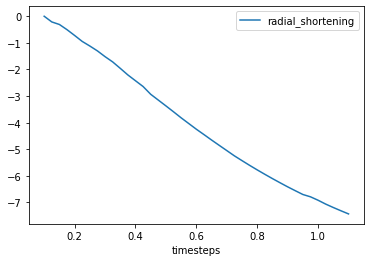

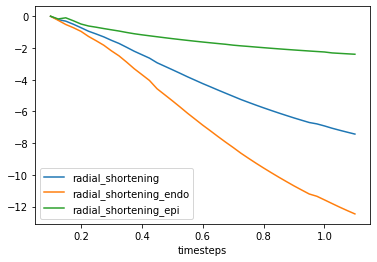

In [12]:
lv.plot_metric(lv.STATES.RS, 
    from_ts=0.1,
    plot_infos=["group"])

Wall thickening:

In [13]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1)

array([-2.39789809e+01, -1.48354399e+01, -7.69570456e+00, -2.95568338e+00,
        0.00000000e+00,  4.85452614e-02, -3.49843266e-01, -1.79813942e-01,
        1.30985930e-02, -4.08790230e-02, -1.40589896e-01, -2.46663642e-01,
       -4.23152529e-01, -5.75695094e-01, -7.56529437e-01, -9.79297798e-01,
       -1.19045083e+00, -1.41937731e+00, -1.79064039e+00, -2.02635399e+00,
       -2.27095923e+00, -2.53352438e+00, -2.80593862e+00, -3.06839180e+00,
       -3.34139836e+00, -3.59281470e+00, -3.86433033e+00, -4.13421030e+00,
       -4.37357557e+00, -4.65095591e+00, -4.91763669e+00, -5.17516783e+00,
       -5.42687366e+00, -5.67506855e+00, -5.92050086e+00, -6.15856219e+00,
       -6.39656776e+00, -6.62337713e+00, -6.84898539e+00, -6.97028438e+00,
       -7.16421985e+00, -7.29184637e+00, -7.50627474e+00, -7.70565141e+00,
       -7.90035968e+00])

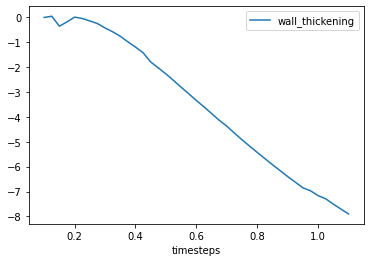

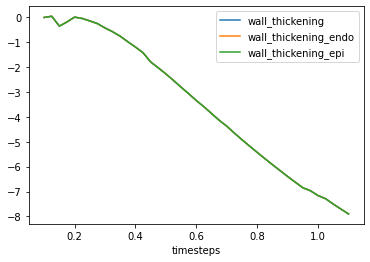

In [14]:
lv.plot_metric(lv.STATES.WT, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal strain:

In [15]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1)

array([ 1.57007438,  1.24447559,  0.83594175,  0.40195562,  0.        ,
       -0.27034695, -0.40696878, -0.33813844, -0.26995788, -0.25915086,
       -0.26092597, -0.27948021, -0.30417403, -0.32860563, -0.35724119,
       -0.38999858, -0.4322372 , -0.48821685, -0.55917377, -0.63440264,
       -0.71115593, -0.79053363, -0.87224093, -0.95619522, -1.04195158,
       -1.12965384, -1.21884246, -1.30779895, -1.3960528 , -1.48432274,
       -1.57141777, -1.65774894, -1.74223163, -1.82552835, -1.90728956,
       -1.98783167, -2.06673695, -2.14456138, -2.22244901, -2.29884268,
       -2.37889888, -2.45373652, -2.51712279, -2.56366256, -2.58796074])

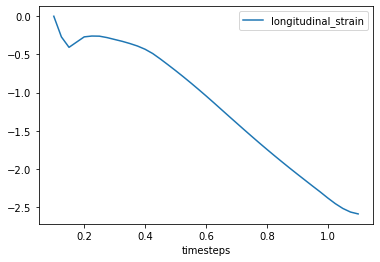

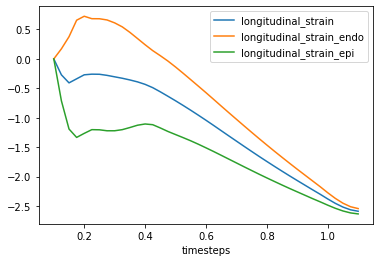

In [16]:
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.1,
    plot_infos=["group"])

Circumferential Strain:

In [17]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)

array([-22.50975286, -15.98966708,  -9.8447155 ,  -4.40484439,
         0.        ,   3.09036525,   3.42158564,   2.79751415,
         2.04473584,   1.67431683,   1.39106489,   1.12199154,
         0.87299438,   0.62457041,   0.37549727,   0.10940208,
        -0.14627177,  -0.39078217,  -0.63061398,  -0.86359587,
        -1.08774618,  -1.30939738,  -1.52982374,  -1.75019853,
        -1.97400506,  -2.19208391,  -2.4105377 ,  -2.623066  ,
        -2.83017282,  -3.03241011,  -3.22392571,  -3.40996572,
        -3.59131543,  -3.76355952,  -3.93120834,  -4.0920636 ,
        -4.24730719,  -4.3882484 ,  -4.51450136,  -4.63337527,
        -4.7638043 ,  -4.88256496,  -4.99067399,  -5.08470597,
        -5.16123545])

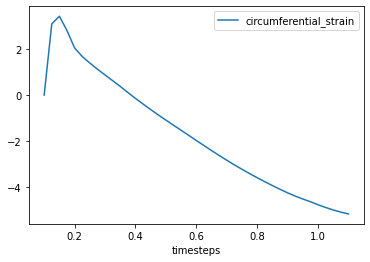

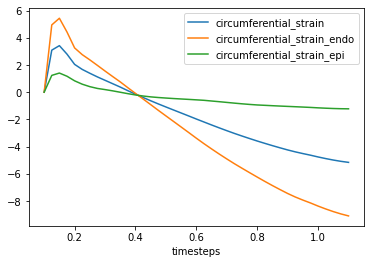

In [18]:
lv.plot_metric(lv.STATES.SC, 
    from_ts=0.1,
    plot_infos=["group"])

Rotation:

In [19]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.rotation(circ_spks, t_ed=0.1)

array([26.55386289, 25.13512693, 23.23266393, 22.32538002, 21.21588119,
       23.66619939, 27.26880846, 25.84664965, 24.17283407, 22.95670989,
       23.42318808, 23.04349198, 22.87593043, 22.2492161 , 22.29200029,
       22.40112178, 21.90983506, 22.69452971, 22.55920059, 22.92721509,
       22.78205956, 22.31013837, 23.54870331, 22.21066263, 22.49953895,
       22.59476571, 23.00993558, 23.1453724 , 22.86458435, 23.7194397 ,
       23.17955694, 23.1785483 , 22.33064027, 23.30036974, 23.8211168 ,
       24.17671875, 24.18480714, 22.43078908, 22.41197192, 23.41682217,
       23.67032752, 23.38683787, 24.93330141, 23.67427004, 23.0388602 ])

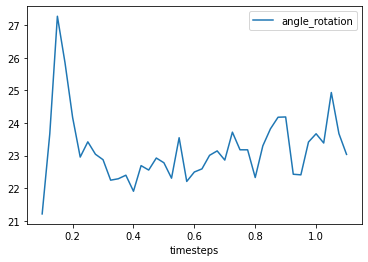

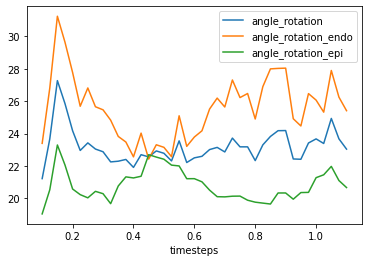

In [20]:
lv.plot_metric(lv.STATES.RO, 
    from_ts=0.1,
    plot_infos=["group"])

Twist:

In [21]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1)

array([-8.81385780e+00, -3.25952757e-01,  1.39739634e+00,  1.06820006e+00,
        2.05118901e+00, -3.80669997e+00, -1.20595777e+01, -9.97336909e+00,
       -5.24574610e+00, -4.32301888e+00, -3.68020939e+00, -1.02544775e+00,
       -9.35124537e+00, -8.68488822e+00, -6.26271411e+00, -5.89167460e+00,
       -5.25747248e+00, -2.39531046e+00, -3.93420017e+00, -1.17080470e+00,
        6.52983979e-02, -5.64757214e+00, -2.35846676e+00, -3.26901085e+00,
       -1.93492104e+00, -6.84695546e-01, -1.62270806e+00, -4.54031733e+00,
       -3.04965059e+00, -3.32819652e+00, -1.63733289e+00, -2.55857514e+00,
       -2.66000719e-01, -5.43789109e+00, -4.05308675e+00, -1.24403127e+00,
        6.89186529e-03,  1.78517543e+00,  2.43798810e+00,  1.91789891e+00,
        2.02397687e+00,  6.52707007e-01,  5.17691749e-01,  5.94945285e-02,
        2.61824298e-01])

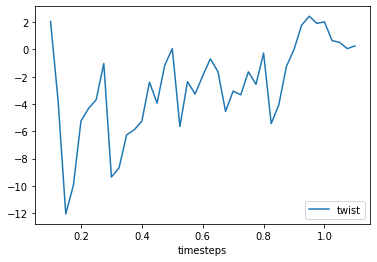

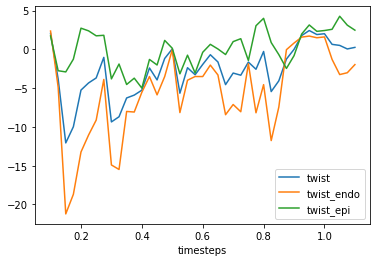

In [22]:
lv.plot_metric(lv.STATES.TW, 
    from_ts=0.1,
    plot_infos=["group"])

Torsion:

In [23]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1)

array([-2.05135366e-01, -7.58628511e-03,  3.25232623e-02,  2.48614868e-02,
        4.77397546e-02, -8.85978433e-02, -2.80676855e-01, -2.32122048e-01,
       -1.22090471e-01, -1.00614746e-01, -8.56538779e-02, -2.38664618e-02,
       -2.17642625e-01, -2.02133704e-01, -1.45759573e-01, -1.37123931e-01,
       -1.22363393e-01, -5.57489012e-02, -9.15653067e-02, -2.72495265e-02,
        1.51976706e-03, -1.31442645e-01, -5.48913942e-02, -7.60835668e-02,
       -4.50337124e-02, -1.59357315e-02, -3.77672093e-02, -1.05672190e-01,
       -7.09781353e-02, -7.74610649e-02, -3.81075902e-02, -5.95487538e-02,
       -6.19095021e-03, -1.26562489e-01, -9.43322951e-02, -2.89538152e-02,
        1.60402555e-04,  4.15485051e-02,  5.67421887e-02,  4.46375361e-02,
        4.71064141e-02,  1.51912243e-02,  1.20488541e-02,  1.38468672e-03,
        6.09374742e-03])

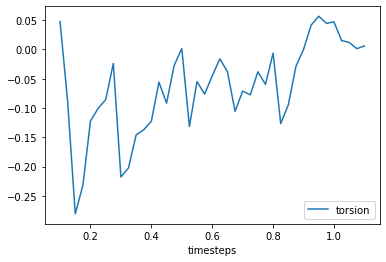

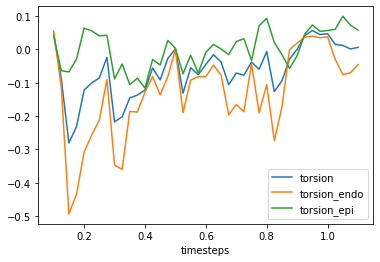

In [24]:
lv.plot_metric(lv.STATES.TO, 
    from_ts=0.1,
    plot_infos=["group"])

In [25]:
lv.STATES.RADIUS.value + "_apex"

'radius_apex'

In [26]:
lv.states.get(lv.STATES.RADIUS.value + "_mid")

array([7.71194579, 7.25737509, 6.83053761, 6.48302402, 6.28072137,
       6.28856564, 6.28345568, 6.29692377, 6.30909962, 6.32118943,
       6.33170141, 6.34134989, 6.35030591, 6.36049429, 6.37133751,
       6.38287742, 6.3932227 , 6.40345649, 6.41363997, 6.42392228,
       6.43409002, 6.44415535, 6.45765225, 6.46770443, 6.47771907,
       6.4881554 , 6.49845673, 6.50849904, 6.5184105 , 6.52842908,
       6.53807831, 6.54743977, 6.55608597, 6.56492704, 6.57345486,
       6.58128573, 6.58929485, 6.59625452, 6.60369583, 6.6108306 ,
       6.6159307 , 6.62266929, 6.63009372, 6.63640693, 6.64256306])

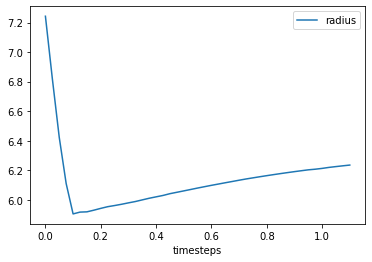

In [27]:
lv.plot_metric(lv.STATES.RADIUS, )

In [28]:
lv.get_metric_as_df(lv.STATES.RADIUS)

(    timesteps    radius
 0       0.000  7.242874
 1       0.025  6.820501
 2       0.050  6.422661
 3       0.075  6.109969
 4       0.100  5.904531
 5       0.125  5.916789
 6       0.150  5.918623
 7       0.175  5.929761
 8       0.200  5.942083
 9       0.225  5.953437
 10      0.250  5.961252
 11      0.275  5.969778
 12      0.300  5.979333
 13      0.325  5.988402
 14      0.350  5.999502
 15      0.375  6.010561
 16      0.400  6.020117
 17      0.425  6.029546
 18      0.450  6.041584
 19      0.475  6.050946
 20      0.500  6.060412
 21      0.525  6.069962
 22      0.550  6.079658
 23      0.575  6.088887
 24      0.600  6.098053
 25      0.625  6.106737
 26      0.650  6.115500
 27      0.675  6.124021
 28      0.700  6.132696
 29      0.725  6.141069
 30      0.750  6.148677
 31      0.775  6.156257
 32      0.800  6.163571
 33      0.825  6.170670
 34      0.850  6.177579
 35      0.875  6.184250
 36      0.900  6.190745
 37      0.925  6.196936
 38      0.950  6.203011
